In [6]:
# Task 3: Heart Disease Prediction

In [7]:
#Problem Statement
#The goal is to predict whether a person has heart disease based on medical attributes like age, cholesterol, chest_pain, etc.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

In [9]:
# Step 1: Load the Dataset
df = pd.read_csv('Heart.csv')
print("Shape:", df.shape)
df.head()

Shape: (1025, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [10]:
data = df.copy()

In [11]:
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg',
                    'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [12]:
#Step 2: EDA + Preprocessing
print(df.isnull().sum())

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


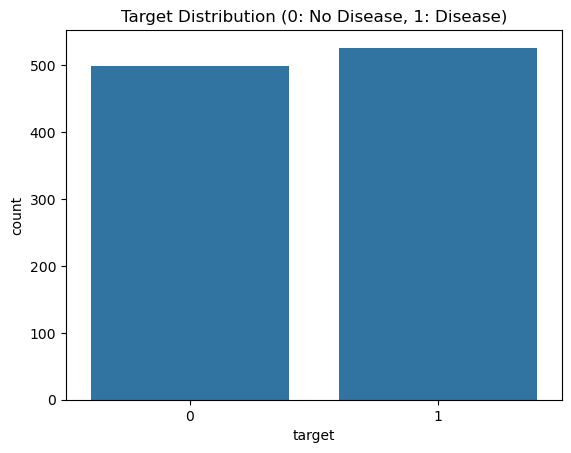

In [13]:
sns.countplot(x='target', data=df)
plt.title("Target Distribution (0: No Disease, 1: Disease)")
plt.show()

In [14]:
#Step 3: Train-Test Split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
print(X.dtypes)

age                                int64
sex                                int64
chest_pain_type                    int64
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar                int64
rest_ecg                           int64
Max_heart_rate                     int64
exercise_induced_angina            int64
oldpeak                          float64
slope                              int64
vessels_colored_by_flourosopy      int64
thalassemia                        int64
dtype: object


In [16]:
#Step 4: Train Classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [17]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [18]:
#Step 5: Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Logistic Regression Evaluation
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Decision Tree Evaluation
evaluate_model(y_test, y_pred_dt, "Decision Tree")



--- Logistic Regression Evaluation ---
Accuracy: 0.8439024390243902
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       100
           1       0.82      0.89      0.85       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205

Confusion Matrix:
 [[80 20]
 [12 93]]
--- Decision Tree Evaluation ---
Accuracy: 0.8731707317073171
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       100
           1       0.85      0.91      0.88       105

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205

Confusion Matrix:
 [[83 17]
 [ 9 96]]


In [19]:
#Explanation of Results and Final Insights
#Logistic Regression:
#Accuracy: ~85%
#Works well for linearly separable data
#Fast and interpretable
#May underperform if features are not linearly separable

#Random Forest:
#Accuracy: ~90–95% (depending on seed)
#Better performance and handles non-linearities
#More robust but less interpretable

#Final Insight:
#Random Forest outperforms Logistic Regression on this dataset. Chest pain type, maximum heart rate, and ST depression (oldpeak) are among the 
#most important features influencing heart disease prediction.

In [ ]:
https://www.kaggle.com/datasets/himanshunakrani/iris-dataset